# A simple genetic algorithm demo

A simple stochastic genetic algorithm demo, using the very simple problem of quadratic regression, to illustrate how genetic algorithms work and what makes a "stochastic algorithm" stochastic.

### What is a Genetic Algorithm?

A **genetic algorithm** is a simple type of machine learning model that uses the concept of "genes" and "evolution" to regress towards a solution to a given problem.

For this demo, we will use a very simple problem: quadratic regression. The goal of the model is to find the coefficients of a second-order polynomial,
$$ax^2 + bx + c$$

### Setup

In [40]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
sns.set_theme()

In [70]:
import random
# random.random() returns a random float between 0.0 and 1.0; this helper
# method returns a random float from -r to +r
random_float = lambda r: (random.random()*2-1) * r

### Simulation Environment

The **environment** of a genetic algorithm is the "problem" we are trying to "solve". For our simple linear regression case, this will be just a dataset to find the best-fit line of, but in more complicated scenarios, this might be a race track or a simple game.

In [117]:
class Environment:
    def __init__(self, a, b, c, randomness_scale):
        # define our parameters
        self.true_a = a
        self.true_b = b
        self.true_c = c
        self.randomness_scale = randomness_scale
        self.generate_data()

    def generate_data(self):
        # generate 50 evenly-spaced xs between -20 and 20
        self.xs = np.linspace(-20, 20, num=50)
        self.ys = [
            self.calculate(x) + random_float(self.randomness_scale)
            for x in self.xs
        ]

    def calculate(self, x):
        return self.true_a * x*x + self.true_b * x + self.true_c

    def graph(self):
        # display scatterplot
        plt.scatter(x=self.xs, y=self.ys)
        # approximate parabola with 1000 points
        approx_xs = np.linspace(-20, 20, num=1000)
        plt.plot(approx_xs, self.calculate(approx_xs))

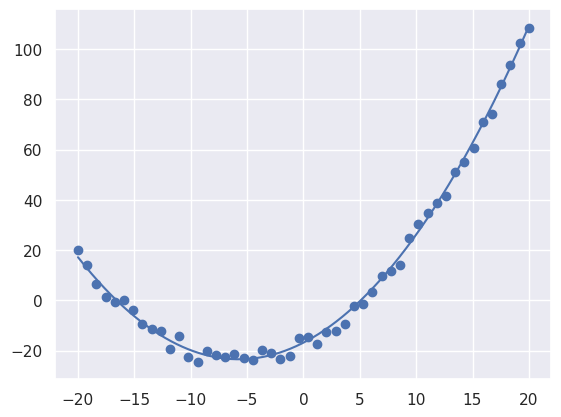

In [118]:
env = Environment(a=0.2, b=2.3, c=-16.8, randomness_scale=4.0)
env.graph()

### Defining the Actors

The **actors** in a genetic algorithm can be thought of as the "creatures" who we are simulating the genetic evolution of. Their behaviors are defined by their **genes**. In this case, with a simple quadratic regression, our `Actor` class contains only three genes: `a`, `b`, and `c`.

In [119]:
class Actor:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

    def __str__(self):
        return f'a={actors[0].a:.2f} b={actors[0].b:.2f} c={actors[0].c:.2f}'

Let's initialize, say, 100 actors, with initial genes as random values that make sense for this simulation.

In [120]:
def generate_initial_actors(n=100):
    return [
        Actor(
            a = random_float(1),
            b = random_float(10),
            c = random_float(100)
        ) for _ in range(n)
    ]

### Fitness function

The **fitness function** is what determines how "good" certain genes are. In our case, with a simple quadratic regression, we'll use the the sum of the squared errors, where in our case a lower fitness is better.

We will also add in a small jitter factor to the error, since in the real world, the fitness function would not know the actual parameters of the environment. Instead, it would measure fitness based on the actor's performance on some given task.

In [187]:
def fitness(environment, actor):
    # remember, our environment is simply a scatterplot dataset!
    accum = 0
    for x,y in zip(environment.xs, environment.ys):
        pred = actor.a * x*x + actor.b * x + actor.c
        sqerror = (y - pred) ** 2
        jitter = sqerror * random_float(0.0000001)
        accum += sqerror + jitter
    return accum / len(environment.xs)

# save this method to our Environment class
Environment.fitness = fitness

### Simulate!

That's all we need to start the simulations! The simulation itself follows these three steps:
1. Score each actor, and calculate its fitness
2. Keep only the top actors (we'll keep the top 10%)
3. Breed the top actors to create the next generation

Since this is a very simple problem, we'll only do 5 steps.

In [188]:
def evolution_step(env, actors):
    # 1. score each actor
    for actor in actors:
        actor.fitness = env.fitness(actor)

    # 2. sort and keep only the top 10%
    n_actors = len(actors)
    n_top_10 = n_actors // 10
    actors = sorted(actors, key=lambda actor: actor.fitness)
    actors = actors[:n_top_10]

    # 3. generate new actors based on the top 10%
    new_actors = []
    for newi in range(n_actors - n_top_10):
        parent = random.choice(actors)
        child = Actor(
            a = parent.a + random_float(0.1),
            b = parent.b + random_float(1),
            c = parent.c + random_float(10)
        )
        new_actors.append(child)
    actors.extend(new_actors)

    return actors

In [189]:
# generate initial actors
actors = generate_initial_actors()

# run evolution simulation
num_iters = 20
for i in range(1, num_iters+1):
    actors = evolution_step(env, actors)

    # let's also print the top fitness every iteration, to see how we're doing
    print(f'round {i:2d}, top fitness {actors[0].fitness : .1f}')

# display best evolved actor
print(f'Best evolved actor has genes {actors[0]}')

round  1, top fitness  68449.1
round  2, top fitness  62449.3
round  3, top fitness  55991.6
round  4, top fitness  50020.0
round  5, top fitness  45459.0
round  6, top fitness  40704.6
round  7, top fitness  36159.5
round  8, top fitness  33567.3
round  9, top fitness  29942.6
round 10, top fitness  26670.3
round 11, top fitness  23693.2
round 12, top fitness  20228.6
round 13, top fitness  17063.8
round 14, top fitness  14764.7
round 15, top fitness  11972.2
round 16, top fitness  9353.5
round 17, top fitness  7090.2
round 18, top fitness  5273.8
round 19, top fitness  4455.0
round 20, top fitness  3191.8
Best evolved actor has genes a=0.46 b=-25.87 c=-92.46


### Results

And that's all there is to it! Let's display this as a graph, and see how good our genetic algorithm did. The blue scatterplot is our original data, while the orange line is the best-fit agent:

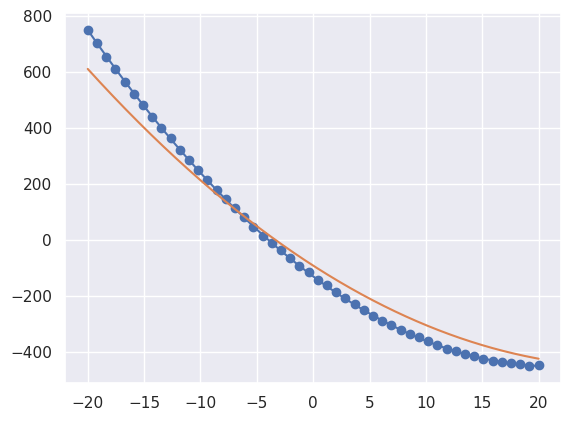

In [190]:
bhue, ohue, *_ = sns.color_palette()

# display environment scatterplot
plt.scatter(x=env.xs, y=env.ys, color=bhue)

# approximate parabolas with 1000 points
approx_xs = np.linspace(-20, 20, num=1000)

# true environment parabola
plt.plot(approx_xs, env.calculate(approx_xs), color=bhue)

# best-fit actor parabola
best_fit = lambda x: actors[0].a * x*x + actors[0].b * x + actors[0].c
plt.plot(approx_xs, best_fit(approx_xs), color=ohue)

### Stochastic Nature

This genetic algorithm can be said to be **stochastic** in nature, which means in some way it is inherently random. In this case, this randomness comes both from the initialization of random genes and from the random perturbations applied to the best genes in the breeding step. 

To exemplify this, if we, using the same environment, run the algorithm again, we will get a slightly different result:

In [191]:
for i in range(5):
    # generate a new set of initial actors
    actors = generate_initial_actors()

    # run evolution simulation again
    for j in range(1, num_iters+1):
        actors = evolution_step(env, actors)
    
    # display the new best evolved actor
    print(f'Best evolved actor has genes {actors[0]}')

Best evolved actor has genes a=0.63 b=-24.75 c=-112.25
Best evolved actor has genes a=0.71 b=-25.99 c=-113.23
Best evolved actor has genes a=0.75 b=-26.99 c=-133.73
Best evolved actor has genes a=0.80 b=-25.34 c=-129.08
Best evolved actor has genes a=0.62 b=-25.00 c=-107.65


Of course, this "randomness" has mitigations; you can use less randomness, or more generations, or a higher population, etc etc, but this randomness is what makes a stochastic algorithm, stochastic. This notebook uses a very low number of generations (20) to highlight this effect.

### Try It!

The below cells define a few helper methods, and below that, an interactive demo to play with our simple genetic algorithm. Simply run the cells and scroll to the bottom to use the demo.

In [192]:
def run_simulation(env, niter, nactor, pkeep, pdistrib):
    # define initial conditions
    print(f'Environment params {Actor(env.true_a, env.true_b, env.true_c)}')
    actors = generate_initial_actors(n=nactor)
    history = { gene: [] for gene in ('a', 'b', 'c', 'fitness') }
    
    # run genetic algorithm
    for i in range(niter):
        
        # calculate fitness
        for actor in actors:
            actor.fitness = env.fitness(actor)

        # track genetic history
        history['a'      ].append([actor.a       for actor in actors])
        history['b'      ].append([actor.b       for actor in actors])
        history['c'      ].append([actor.c       for actor in actors])
        history['fitness'].append([actor.fitness for actor in actors])

        # keep top %
        n_top = round(nactor * pkeep)
        actors = sorted(actors, key=lambda actor: actor.fitness)
        actors = actors[:n_top]

        # breed new population
        rng_scale = (1.0-pdistrib) ** i
        new_actors = []
        for newi in range(nactor - n_top):
            parent = random.choice(actors)
            child = Actor(
                a = parent.a + random_float(  1 * rng_scale),
                b = parent.b + random_float( 10 * rng_scale),
                c = parent.c + random_float(100 * rng_scale)
            )
            new_actors.append(child)
        actors.extend(new_actors)

    # any closing statements?
    print(f'Best evolved actor after {niter} steps has genes {actors[0]}')
    return history

In [193]:
import ipywidgets
from IPython.display import display

slider_styling = {
    'style': {'description_width': '150px'},
    'layout': {'width': '500px'}
}
out = ipywidgets.Output()

# ==========
display(ipywidgets.Label(value='Environment settings'))

true_a_widget = ipywidgets.FloatSlider(
    description=r'True \(a\):',
    value=0.7, min=-5, max=5,
    **slider_styling
)
display(true_a_widget)

true_b_widget = ipywidgets.FloatSlider(
    description=r'True \(b\):',
    value=-30, min=-50, max=50,
    **slider_styling
)
display(true_b_widget)

true_c_widget = ipywidgets.FloatSlider(
    description=r'True \(c\):',
    value=-131, min=-500, max=500,
    **slider_styling
)
display(true_c_widget)

randomness_scale_widget = ipywidgets.FloatLogSlider(
    description='Randomness scale:',
    value=4.0, min=0.0, max=10.0,
    **slider_styling
)
display(randomness_scale_widget)

env_button_widget = ipywidgets.Button(
    description='Create Environment',
    tooltip='Re-create the environment with the given settings.'
)
display(env_button_widget)

# ==========
display(ipywidgets.Label(value='Evolution settings'))

num_iters_widget = ipywidgets.IntSlider(
    description='Evolution steps:',
    value=10, min=0, max=40,
    **slider_styling
)
display(num_iters_widget)

num_actors_widget = ipywidgets.IntSlider(
    description='Number of actors:',
    value=100, min=10, max=200, step=5,
    **slider_styling
)
display(num_actors_widget)

percent_keep_widget = ipywidgets.FloatSlider(
    description='Top % to keep:',
    value=0.1, min=0.0, max=1.0, step=0.05,
    **slider_styling
)
display(percent_keep_widget)

percent_distrib_widget = ipywidgets.FloatSlider(
    description='Gene distrib shrink %:',
    value=0.4, min=0.0, max=1.0, step=0.05,
    **slider_styling
)
display(percent_distrib_widget)

# ==========
run_button_widget = ipywidgets.Button(
    description='Run Simulation',
    tooltip='Run a simulation with the given settings.'
)
display(run_button_widget)

# ==========

@out.capture(clear_output=True, wait=True)
def env_button(button):
    global env
    a = true_a_widget.value
    b = true_b_widget.value
    c = true_c_widget.value
    r = randomness_scale_widget.value
    env = Environment(a, b, c, r)
    # display scatterplot
    plt.scatter(x=env.xs, y=env.ys)
    # approximate parabola with 1000 points
    approx_xs = np.linspace(-20, 20, num=1000)
    plt.plot(approx_xs, env.calculate(approx_xs))
    plt.show()

@out.capture(clear_output=True, wait=True)
def run_button(button):
    # run simulation
    global env
    niter = num_iters_widget.value
    nactor = num_actors_widget.value
    pkeep = percent_keep_widget.value
    pdistrib = percent_distrib_widget.value
    history = run_simulation(env, niter, nactor, pkeep, pdistrib)
    # display evolution of genes over time
    fig, ax = plt.subplots(3, sharex=True)
    plt.xticks([i+1 for i in range(nactor)])
    plt.xlabel('Iteration')
    ahue, bhue, chue, *_ = sns.color_palette()
    for i in range(niter):
        sns.scatterplot(
            x=[i+1 for _ in range(nactor)], y=history['a'][i],
            color=ahue,
            markers=False,
            ax=ax[0])
        sns.scatterplot(
            x=[i+1 for _ in range(nactor)], y=history['b'][i],
            color=bhue,
            markers=False,
            ax=ax[1])
        sns.scatterplot(
            x=[i+1 for _ in range(nactor)], y=history['c'][i],
            color=chue,
            markers=False,
            ax=ax[2])
    # mark actual environment
    ax[0].axhline(y=env.true_a, color=ahue)
    ax[1].axhline(y=env.true_b, color=bhue)
    ax[2].axhline(y=env.true_c, color=chue)
    plt.show()

env_button_widget.on_click(env_button)
run_button_widget.on_click(run_button)

display(out)

Label(value='Environment settings')

FloatSlider(value=0.7, description='True \\(a\\):', layout=Layout(width='500px'), max=5.0, min=-5.0, style=Sli…

FloatSlider(value=-30.0, description='True \\(b\\):', layout=Layout(width='500px'), max=50.0, min=-50.0, style…

FloatSlider(value=-131.0, description='True \\(c\\):', layout=Layout(width='500px'), max=500.0, min=-500.0, st…

FloatLogSlider(value=4.0, description='Randomness scale:', layout=Layout(width='500px'), max=10.0, style=Slide…

Button(description='Create Environment', style=ButtonStyle(), tooltip='Re-create the environment with the give…

Label(value='Evolution settings')

IntSlider(value=10, description='Evolution steps:', layout=Layout(width='500px'), max=40, style=SliderStyle(de…

IntSlider(value=100, description='Number of actors:', layout=Layout(width='500px'), max=200, min=10, step=5, s…

FloatSlider(value=0.1, description='Top % to keep:', layout=Layout(width='500px'), max=1.0, step=0.05, style=S…

FloatSlider(value=0.4, description='Gene distrib shrink %:', layout=Layout(width='500px'), max=1.0, step=0.05,…

Button(description='Run Simulation', style=ButtonStyle(), tooltip='Run a simulation with the given settings.')

Output()